In [1]:
#data handling, model creation/evaluation
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn import metrics
import scipy.stats as stats

# visualization
%matplotlib inline
import seaborn as sns

### NULL ACCURACY 

Null accuracy measures what our expected accuracy should be if we run the most frequent response as our prediction for every new sample we see.

In [13]:
## Applying Logistic regression on Vertebral data
vertebral_data = pd.read_csv('C:/Users/Madhumitha.Ganesan/Desktop/DataScience/DataScience/data/vertebral_column_2_categories.txt',
                             sep=" ",
                             names = ["pelvic_incidence","pelvic_tilt","lumbar_lordosis_angle",
                                    "sacral_slope","pelvic_radius","spondy_grade","outcome"])
vertebral_data.outcome.value_counts()
vertebral_data.outcome =(vertebral_data.outcome == 'AB').astype(int)
X = vertebral_data[vertebral_data.columns.to_list()[:-1]]
y=vertebral_data.outcome

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

lr=LogisticRegression(C=1e9,solver='lbfgs')
lr.fit(X_train,y_train)
y_test_pred = lr.predict(X_test)

print("Predicted accuracy of Logistic Regression model is ",metrics.accuracy_score(y_test,y_test_pred))

Predicted accuracy of Logistic Regression model is  0.8709677419354839


In [14]:
## Manually computing NULL accuracy
print("NUll accuracy on the test set is ",y_test.mean())

NUll accuracy on the test set is  0.7096774193548387


In [15]:
## Identifying NULL accuracy using Dummy Classifier

from sklearn.dummy import DummyClassifier
dumb_model = DummyClassifier(strategy='most_frequent')
dumb_model.fit(X_train,y_train)
y_dumb_class=dumb_model.predict(X_test)
print("Most frequent class dummy classifier test accuracy is ", metrics.accuracy_score(y_test,y_dumb_class))

Most frequent class dummy classifier test accuracy is  0.7096774193548387


In [19]:
## Logistic model with cross - fold metrics 10 fold

dumb_model1=DummyClassifier(strategy='most_frequent')
scores=cross_val_score(dumb_model1,X_train,y_train,cv=10,scoring='accuracy')
print("10 fold Cross val score metrics accuracy is ",scores.mean())

10 fold Cross val score metrics accuracy is  0.6638339920948617


In [25]:
## Logistic model with cross - fold metrics 30 fold

dumb_model2=DummyClassifier(strategy='most_frequent')
scores1=cross_val_score(dumb_model2,X_train,y_train,cv=30,scoring='accuracy')
print("10 fold Cross val score metrics accuracy is ",scores1.mean())

10 fold Cross val score metrics accuracy is  0.6660714285714289


In [27]:
## Confusion Matrix
## Rows = Actual
## COlumns = Predicted
#  [TN  FP
#   FN  TP]
cm=metrics.confusion_matrix(y_test,y_test_pred)
cm

array([[21,  6],
       [ 6, 60]], dtype=int64)

In [28]:

# calculate each metric by hand
print("Sensitivity/Recall (TPR): ",cm[1,1] / float(cm[1,1] + cm[1,0]))
print("Specificity (TNR): ", cm[0,0] / float(cm[0,0] + cm[0,1]))
print("Precision (PPV): ", cm[1,1] / float(cm[1,1]+cm[0,1]))
print("NPV: ", cm[0,0] / float(cm[0,0]+cm[1,0]))
print("Accuracy: ", (cm[1,1]+cm[0,0]) / float(cm.sum()))
print("F1:", metrics.f1_score(y_test,y_test_pred))

Sensitivity/Recall (TPR):  0.9090909090909091
Specificity (TNR):  0.7777777777777778
Precision (PPV):  0.9090909090909091
NPV:  0.7777777777777778
Accuracy:  0.8709677419354839
F1: 0.9090909090909091


In [29]:
# calculate some of these metrics using sklearn and the test set samples
print("Sensitivity/Recall (TPR): ",metrics.recall_score(y_test,y_test_pred))
print("Precision (PPV): ", metrics.precision_score(y_test,y_test_pred))
print("Accuracy: ", metrics.accuracy_score(y_test,y_test_pred))
print("F1:", metrics.f1_score(y_test,y_test_pred))

Sensitivity/Recall (TPR):  0.9090909090909091
Precision (PPV):  0.9090909090909091
Accuracy:  0.8709677419354839
F1: 0.9090909090909091


In [30]:
print("Classification Report:\n", metrics.classification_report(y_test,y_test_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78        27
           1       0.91      0.91      0.91        66

    accuracy                           0.87        93
   macro avg       0.84      0.84      0.84        93
weighted avg       0.87      0.87      0.87        93



In [81]:
### PREDICTION PROBABILITIES 

predicted_probs_lr = lr.predict_proba(X_test).round(3)
predicted_lr = lr.predict(X_test)

print("Logistic regression predicted probabilities for first 5 samples are : ", predicted_probs_lr[:5])
print("Logistic regression predicted for first 5 samples are : ",predicted_lr[:5])

y_test_lr_df = pd.DataFrame(np.concatenate((predicted_probs_lr,predicted_lr.reshape(predicted_lr.shape[0],-1),y_test.values.reshape(y_test.shape[0],-1)),axis=1),columns=["class_0","class_1","predicted","actual"])

y_test_lr_df.head()

Logistic regression predicted probabilities for first 5 samples are :  [[0.018 0.982]
 [0.111 0.889]
 [0.011 0.989]
 [0.094 0.906]
 [0.01  0.99 ]]
Logistic regression predicted for first 5 samples are :  [1 1 1 1 1]


,class_0,class_1,predicted,actual
0,0.018,0.982,1.0,1.0
1,0.111,0.889,1.0,0.0
2,0.011,0.989,1.0,1.0
3,0.094,0.906,1.0,1.0
4,0.010,0.990,1.0,1.0


In [85]:
## Predicted Probabilities for trained model using Random forests

rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

predicted_rf_probs=rf.predict_proba(X_test)
predicted_rf = rf.predict(X_test)

y_test_rf_df = pd.DataFrame(np.concatenate((predicted_rf_probs,predicted_rf.reshape(predicted_rf.shape[0],-1),y_test.values.reshape(y_test.shape[0],-1)),axis=1),columns=["column_0","columns_1","predicted","actual"])
y_test_rf_df.head(10)

,column_0,columns_1,predicted,actual
0,0.09,0.91,1.0,1.0
1,0.28,0.72,1.0,0.0
2,0.04,0.96,1.0,1.0
3,0.02,0.98,1.0,1.0
4,0.19,0.81,1.0,1.0
5,0.06,0.94,1.0,1.0
6,0.83,0.17,0.0,0.0
7,0.01,0.99,1.0,1.0
8,0.01,0.99,1.0,1.0
9,0.57,0.43,0.0,0.0


## For both logistic regression and Random Forest probabilities , the threshold value is set to 0.5 for determining the predicted class.
## This threshold need not always be 0.5


## The thresholds can be varied and this can be illustrated by the ROC curve (Receiver Operating Characteristic Curve)

c:\users\madhumitha.ganesan\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location 'Lower right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':


Text(0, 0.5, 'True Positive rate (Sensitivity)')

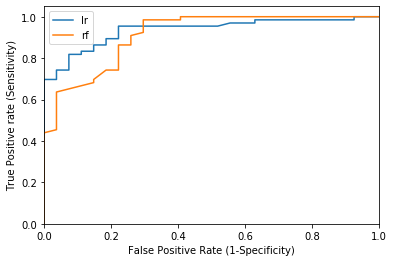

In [96]:
## Generate Logistic Regression model false positive and true positive rates
fp_lr,tp_lr,thresholds_lr = metrics.roc_curve(y_test,predicted_probs_lr[:,1])

## Generate same for Random forest Classifier
fpr_rf,tpr_rf,thresholds_rf = metrics.roc_curve(y_test,predicted_rf_probs[:,1])

## Plot LR and RF model ROC curves
sns.mpl.pyplot.plot(fp_lr,tp_lr,label="lr")
sns.mpl.pyplot.plot(fpr_rf,tpr_rf,label="rf")
sns.mpl.pyplot.xlim([0,1])
sns.mpl.pyplot.ylim([0,1.05])
sns.mpl.pyplot.legend(loc="Lower right")
sns.mpl.pyplot.xlabel("False Positive Rate (1-Specificity)")
sns.mpl.pyplot.ylabel("True Positive rate (Sensitivity)")

In [97]:
### Metric AUC (Area under Curve) allows you to quantify the overall performance of binary classifier, regardless of threshold.
## Higher AUC, better the predicted probabilities in the model

In [98]:
## Calculate AUC value for RF and LR models
print("LR model AUC is ",metrics.roc_auc_score(y_test,predicted_probs_lr[:,1]))
print("RF model AUC is ",metrics.roc_auc_score(y_test,predicted_rf_probs[:,1]))

LR model AUC is  0.9357463524130191
RF model AUC is  0.9118967452300786


Text(0, 0.5, 'True Positive rate (Sensitivity) or Class 1 Threshold Probability')

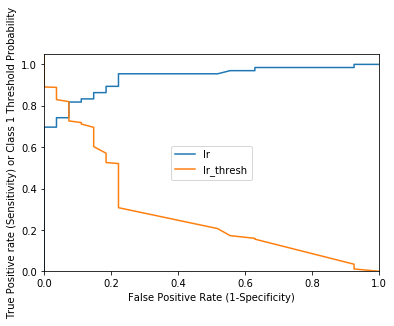

In [99]:
## Plotting the ROC curve for LR False Positives vs Class 1 Thresholds 

sns.mpl.pyplot.plot(fp_lr,tp_lr,label="lr")
sns.mpl.pyplot.plot(fp_lr,thresholds_lr,label="lr_thresh")
sns.mpl.pyplot.xlim([0,1])
sns.mpl.pyplot.ylim([0,1.05])
sns.mpl.pyplot.legend(loc="center")
sns.mpl.pyplot.xlabel("False Positive Rate (1-Specificity)")
sns.mpl.pyplot.ylabel("True Positive rate (Sensitivity) or Class 1 Threshold Probability")

In [105]:
## Using the new threshold as 0.7 and generating the predictions and seeing the confusion matrix

y_test_lr_df.head()

,class_0,class_1,predicted,actual
0,0.018,0.982,1.0,1.0
1,0.111,0.889,1.0,0.0
2,0.011,0.989,1.0,1.0
3,0.094,0.906,1.0,1.0
4,0.010,0.990,1.0,1.0


In [117]:
y_test_lr_df["predicted_07"] = (y_test_lr_df.class_1 > 0.7).astype(float)
y_test_lr_df.head()

print("Confusion matrix for LR predicted model is ",metrics.confusion_matrix(y_test,y_test_pred))
print("Classification report for LR predicted model is ",metrics.classification_report(y_test_lr_df.actual,y_test_lr_df.predicted))

print("Confusion matrix for selected threshold applied prediction is ",metrics.confusion_matrix(y_test,y_test_lr_df.predicted_07))
print("Classification report for selected threshold model is ",metrics.classification_report(y_test_lr_df.actual,y_test_lr_df.predicted_07))

Confusion matrix for LR predicted model is  [[21  6]
 [ 6 60]]
Classification report for LR predicted model is                precision    recall  f1-score   support

         0.0       0.78      0.78      0.78        27
         1.0       0.91      0.91      0.91        66

    accuracy                           0.87        93
   macro avg       0.84      0.84      0.84        93
weighted avg       0.87      0.87      0.87        93

Confusion matrix for selected threshold applied prediction is  [[24  3]
 [11 55]]
Classification report for selected threshold model is                precision    recall  f1-score   support

         0.0       0.69      0.89      0.77        27
         1.0       0.95      0.83      0.89        66

    accuracy                           0.85        93
   macro avg       0.82      0.86      0.83        93
weighted avg       0.87      0.85      0.85        93



## Always use predicted probabilities for computing AUC rather than the class labels

In [119]:
# calculate AUC using y_pred_class (producing incorrect results)
print("Wrong way to calculate LR model AUC: ",metrics.roc_auc_score(y_test, predicted_lr))
print("Wrong way to calculate RF model AUC: ",metrics.roc_auc_score(y_test, predicted_rf))

Wrong way to calculate LR model AUC:  0.8434343434343434
Wrong way to calculate RF model AUC:  0.8097643097643098


array([<matplotlib.axes._subplots.AxesSubplot object at 0x14C34EF0>,
      dtype=object)

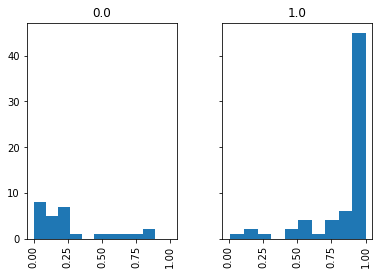

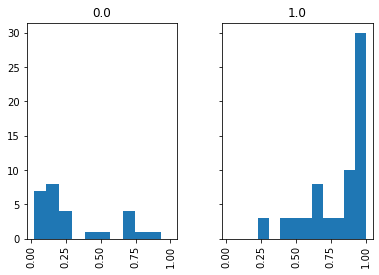

In [121]:
## Histogram to compare the predicted probabilities grouped by actual response value for LR

y_test_lr_df.class_1.hist(by=y_test_lr_df.actual,sharex=True,sharey=True)
y_test_rf_df.columns_1.hist(by=y_test_rf_df.actual,sharex=True,sharey=True)

### For ROC/AUC - Only the order of Probabilities matter, not the values

In [126]:
verteb_data=pd.read_csv("C:/Users/Madhumitha.Ganesan/Desktop/DataScience/DataScience/data/vertebral_column_2_categories.txt",sep=" ",names=["pelvic_incidence","pelvic_tilt","lumbar_lordosis_angle",
                                    "sacral_slope","pelvic_radius","spondy_grade","outcome"])

## Converting outcome to binary value
le=LabelEncoder()
verteb_data.outcome=le.fit_transform(verteb_data.outcome)
X=verteb_data[verteb_data.columns.tolist()[:-1]]
y=verteb_data.outcome

## Create test/train split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
## Creating Logistic Regression model
lr=LogisticRegression(solver='lbfgs')
lr.fit(X_train,y_train)

y_test_pred = lr.predict(X_test)
print("test set accuracy of 0.5 threshold value LR model is ",metrics.accuracy_score(y_test,y_test_pred))

test set accuracy of 0.5 threshold value LR model is  0.8709677419354839


(array([45.,  8.,  5.,  3.,  5.,  2.,  1.,  8.,  6., 10.]),
 array([1.35747793e-09, 9.98818149e-02, 1.99763628e-01, 2.99645442e-01,
        3.99527256e-01, 4.99409069e-01, 5.99290883e-01, 6.99172696e-01,
        7.99054510e-01, 8.98936323e-01, 9.98818137e-01]),
 <a list of 10 Patch objects>)

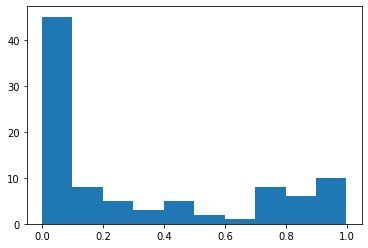

In [134]:
## Calculate predicted probabilites of class 1
y_test_prob1 = lr.predict_proba(X_test)[:,1]
## Showing predicted probabilities in histogram
sns.mpl.pyplot.hist(y_test_prob1)

In [135]:
## Calculate AUC
metrics.roc_auc_score(y_test,y_test_prob1)

0.936026936026936

Text(0, 0.5, 'True positive rate (sensitivity)')

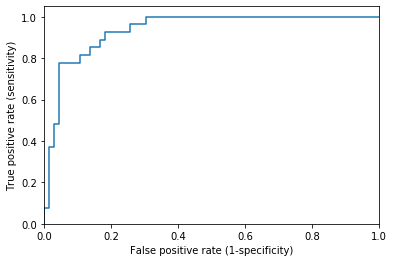

In [136]:
## Plot ROC curve
fpr,tpr,thesholds = metrics.roc_curve(y_test,y_test_prob1)
sns.mpl.pyplot.plot(fpr,tpr)
sns.mpl.pyplot.xlim([0,1])
sns.mpl.pyplot.ylim([0,1.05])
sns.mpl.pyplot.xlabel('False positive rate (1-specificity)')
sns.mpl.pyplot.ylabel('True positive rate (sensitivity)')

## Take the square root of predicted probabilities (makes them all bigger, but preserve the order of probabilities)

In [139]:
y_test_prob2=np.sqrt(y_test_prob1)

##Old predicted probabilities
print("Old predicted probabilities are ",y_test_prob1[:10].round(3))
## New square root predicted probabilities
print("new predicted probabilities are ",y_test_prob2[:10].round(3))

Old predicted probabilities are  [0.018 0.111 0.011 0.094 0.01  0.041 0.792 0.    0.001 0.479]
new predicted probabilities are  [0.134 0.333 0.103 0.306 0.099 0.203 0.89  0.014 0.024 0.692]


(array([30., 10.,  4.,  5.,  6.,  5.,  6.,  2.,  9., 16.]),
 array([3.68439673e-05, 9.99740489e-02, 1.99911254e-01, 2.99848459e-01,
        3.99785664e-01, 4.99722869e-01, 5.99660074e-01, 6.99597279e-01,
        7.99534484e-01, 8.99471689e-01, 9.99408894e-01]),
 <a list of 10 Patch objects>)

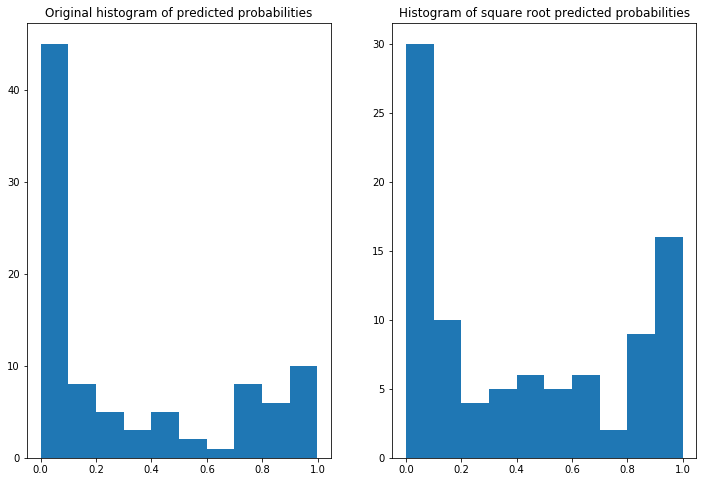

In [140]:
# you can see the histogram changed
figure = sns.mpl.pyplot.figure(figsize=(12,8))
figure.add_subplot(121)
sns.mpl.pyplot.title("Original histogram of predicted probabilities")
sns.mpl.pyplot.hist(y_test_prob1)
figure.add_subplot(122)
sns.mpl.pyplot.title("Histogram of square root predicted probabilities")
sns.mpl.pyplot.hist(y_test_prob2)

In [142]:
# the AUC did not change
print("Old AUC: ",metrics.roc_auc_score(y_test, y_test_prob1))
print("New AUC: ",metrics.roc_auc_score(y_test, y_test_prob2))

Old AUC:  0.936026936026936
New AUC:  0.936026936026936


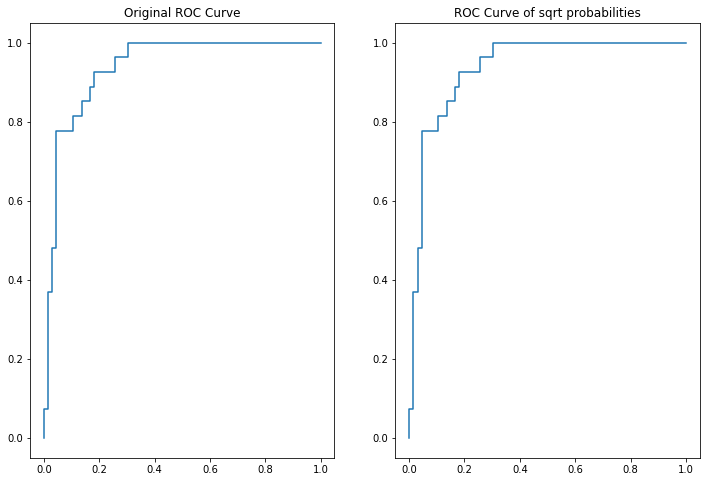

In [143]:

# the ROC curve did not change
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, y_test_prob2)
figure = sns.mpl.pyplot.figure(figsize=(12,8))
figure.add_subplot(121)
sns.mpl.pyplot.plot(fpr, tpr)
sns.mpl.pyplot.title("Original ROC Curve")
figure.add_subplot(122)
sns.mpl.pyplot.title("ROC Curve of sqrt probabilities")
sns.mpl.pyplot.plot(fpr2, tpr2)

###Make small predicted probabilities smaller, and make big predicted probabilities bigger

In [144]:
y_test_prob3 = np.where(y_test_prob1 > 0.5, np.sqrt(y_test_prob1), y_test_prob1**2)
# you can see these are different from y_pred_prob1 and y_pred_prob2
y_test_prob3[:10]

array([3.26158120e-04, 1.23391965e-02, 1.11883745e-04, 8.81021767e-03,
       9.55300652e-05, 1.70719347e-03, 8.90123570e-01, 3.81405067e-08,
       3.57261555e-07, 2.29312919e-01])

(array([59.,  3.,  4.,  0.,  0.,  0.,  0.,  2.,  9., 16.]),
 array([1.84274633e-18, 9.99408894e-02, 1.99881779e-01, 2.99822668e-01,
        3.99763557e-01, 4.99704447e-01, 5.99645336e-01, 6.99586226e-01,
        7.99527115e-01, 8.99468004e-01, 9.99408894e-01]),
 <a list of 10 Patch objects>)

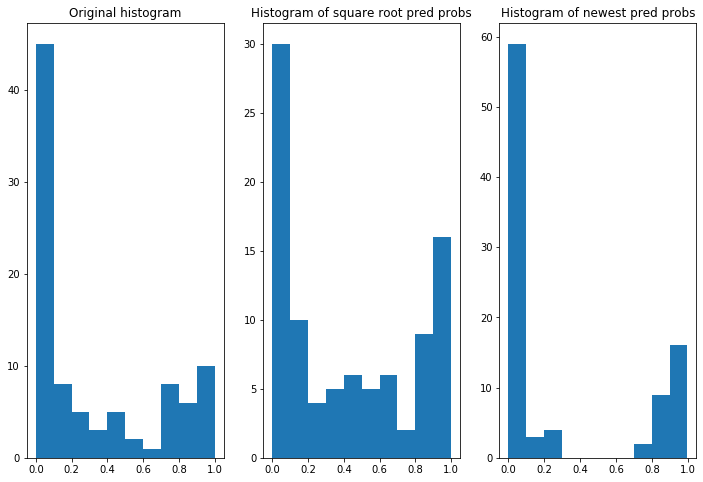

In [145]:
# the histogram changed
# you can see the histogram changed
figure = sns.mpl.pyplot.figure(figsize=(12,8))
figure.add_subplot(131)
sns.mpl.pyplot.title("Original histogram")
sns.mpl.pyplot.hist(y_test_prob1)
figure.add_subplot(132)
sns.mpl.pyplot.title("Histogram of square root pred probs")
sns.mpl.pyplot.hist(y_test_prob2)
figure.add_subplot(133)
sns.mpl.pyplot.title("Histogram of newest pred probs")
sns.mpl.pyplot.hist(y_test_prob3)

In [146]:
# the AUC did not change
print("Original AUC: ",metrics.roc_auc_score(y_test, y_test_prob1))
print("Square root probs AUC: ",metrics.roc_auc_score(y_test, y_test_prob2))
print("Newest transformed AUC: ",metrics.roc_auc_score(y_test, y_test_prob3))

Original AUC:  0.936026936026936
Square root probs AUC:  0.936026936026936
Newest transformed AUC:  0.936026936026936


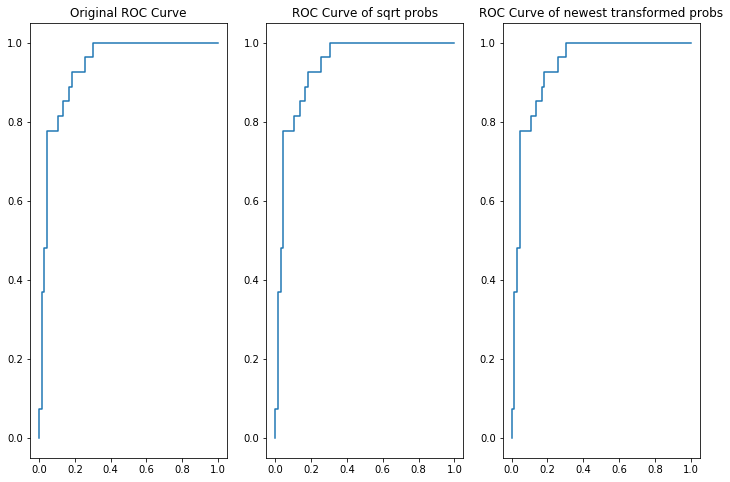

In [147]:
fpr3, tpr3, thresholds2 = metrics.roc_curve(y_test, y_test_prob3)
# the ROC curve did not change
figure = sns.mpl.pyplot.figure(figsize=(12,8))
figure.add_subplot(131)
sns.mpl.pyplot.plot(fpr, tpr)
sns.mpl.pyplot.title("Original ROC Curve")
figure.add_subplot(132)
sns.mpl.pyplot.title("ROC Curve of sqrt probs")
sns.mpl.pyplot.plot(fpr2, tpr2)
figure.add_subplot(133)
sns.mpl.pyplot.title("ROC Curve of newest transformed probs")
sns.mpl.pyplot.plot(fpr3, tpr3)